## python求解常微分方程

In [ ]:
# 一阶常微分方程

import sympy as sp
x = sp.var('x')
y = sp.Function('y')
eq = y(x).diff(x)+2*y(x)-2*x**2-2*x

# ics={}传入初始条件
s = sp.dsolve(eq,ics = {y(0):1})

# 给方程化简可有可无
s = sp.simplify(s)
print(s)

In [ ]:
# 二阶常微分方程

import sympy as sp
x = sp.var('x')
y = sp.Function('y')
eq = y(x).diff(x,2)-2*y(x).diff(x)+y(x)-sp.exp(x)

# 传入一个字典(表示初始化的值)
con = {y(0):1,y(x).diff(x).subs(x,0):-1}
s = sp.dsolve(eq,ics = con)
print(s)

In [ ]:
# 两个函数求微分方程

import sympy as sp

# 定义函数变量
t = sp.var('t')
y = sp.Function('y')
u = sp.Function('u')
u = sp.exp(-t)*sp.cos(t)

# 目标方程
eq = y(t).diff(t,4)+10*y(t).diff(t,3)+35*y(t).diff(t,2)+50*y(t).diff(t,1)+\
    24*y(t)-sp.diff(u,t,2)

# 初值条件
con = {
    y(0):0,
    y(t).diff(t).subs(t,0):-1,
    y(t).diff(t,2).subs(t,0):1,
    y(t).diff(t,3).subs(t,0):1
} 
s = sp.dsolve(eq,ics=con)
s = sp.expand(s)
print(s)
print('第二个子项','*'*50)
print(s.args[1])

In [ ]:
# 矩阵求解微分方程

import sympy as sp
sp.var('t')
# 定义变量x从1到3左闭右开 x1:4
sp.var('x1:4',cls = sp.Function)
x = sp.Matrix([x1(t),x2(t),x3(t)])
A = sp.Matrix([[3,-1,1],
               [2,0,-1],
               [1,-1,2]])
eq = x.diff(t)-A@x

# 初值条件
con = {x1(0):1,x2(0):1,x3(0):1}
s = sp.dsolve(eq,ics = con)
print(s)

x = [0.         0.10344828 0.20689655 0.31034483 0.4137931  0.51724138
 0.62068966 0.72413793 0.82758621 0.93103448 1.03448276 1.13793103
 1.24137931 1.34482759 1.44827586 1.55172414 1.65517241 1.75862069
 1.86206897 1.96551724 2.06896552 2.17241379 2.27586207 2.37931034
 2.48275862 2.5862069  2.68965517 2.79310345 2.89655172 3.        ]
对应的数值解y = [1.         0.82380532 0.70394393 0.6338875  0.60832784 0.62294884
 0.67424099 0.75935081 0.87595804 1.02217608 1.19647095 1.39759535
 1.6245351  1.87646557 2.15271624 2.45274191 2.7760993  3.12242793
 3.49143473 3.88288139 4.29657414 4.73235543 5.19009716 5.66969515
 6.17106471 6.69413697 7.23885594 7.80517609 8.39306039 9.00247875]


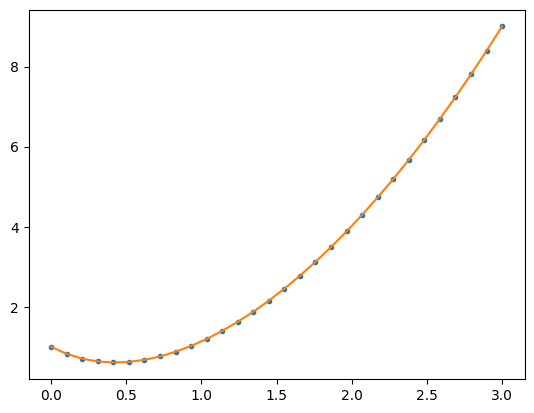

In [2]:
import sympy as sp
import numpy as np
import pylab as plt
from scipy.integrate import odeint
# 定义方程，类似于隐函数
dy = lambda y,x : -2*y+2*x**2+2*x
xx = np.linspace(0,3,30)
s = odeint(dy,1,xx)
print('x = {}\n对应的数值解y = {}'.format(xx,s.flatten()))
plt.plot(xx,s,'.')
sp.var('x')
y = sp.Function('y')
eq = y(x).diff(x)+2*y(x)-2*x**2-2*x
s2 = sp.dsolve(eq,ics={y(0):1})

# 符号函数转匿名函数 转化为numpy的操作对象
sx = sp.lambdify(x,s2.args[1],'numpy')
plt.plot(xx,sx(xx))
plt.show()

In [ ]:
# 求解隐函数方程
from sympy import solve,symbols,Eq
x,y = sp.symbols('x,y')
# 左边表达式，右边值f(x,y)=0
s2 = Eq(y*x**2 + y**2 - 1, 0)
# 解隐函数方程
solutions = solve(s2, x)

# 提取关于 x 的表达式
# 输出多个参数的返回值，只取第一个返回值
x_expression = solutions[0]
print(x_expression)

In [ ]:
from sympy import symbols
x, y = symbols('x y')
f = x**2 + y
print(f.args[0])